In [ ]:
'''
PCA : 

PCA is a statistical method that allows you to “regroup” your variables into a smaller number of variables, called components. 
This regrouping is done based on variation that is common to multiple variables.

In [ ]:
'''
PCA reduces the dimension by finding a few orthogonal linear combinations (principal components) of the original variables 
with the largest variance.

The first principal component captures most of the variance in the data. The second principal component is orthogonal to the 
first principal component and captures the remaining variance, which is left of first principal component and so on.

There are as many principal components as the number of original variables.
These principal components are uncorrelated and are ordered in such a way that the first several principal components 
explain most of the variance of the original data

In [ ]:
'''
The number of components extracted explain the maximum variance present in the data from the observed original variables.

In [ ]:
'''
Mathematically Principal component analysis (PCA) is usually explained via an eigen-decomposition of the covariance matrix.

In [ ]:
'''
The goal of PCA is to regroup variables in such a way that the first (newly created) component(PCA1) contains a maximum of 
variation. The second component(PCA2) contains the second-largest amount of variation, etc etc. 
The last component logically contains the smallest amount of variation.

In [ ]:
'''
The mathematical definition of the PCA problem is to find a linear combination of the original variables with maximum variance.

In [ ]:
'''
n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset

In [ ]:
'''
Variance:
    - Variance reports variation of a single random variable

Covariance
    - Covariance reports how much two random variables
    
Eigen Decomposition
    - Eigen Decomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues
    - Eigenvectors are simple unit vectors, and eigenvalues are coefficients which give the magnitude to the eigenvectors.
    
Eigen Value:
    - It basically measures the variance in all variables which is accounted for by that factor

In [ ]:
'''
Benefits of PCA
    - Reduces training time — due to smaller dataset
    - Removes noise — by keeping only what’s relevant
    - Makes visualization possible — in cases where you have a maximum of 3 principal components

In [ ]:
'''
How does PCA works?
    0.STANDARDIZATION the data
    1.Calculate the covariance matrix X of data points.
    2.Calculate eigen vectors and corresponding eigen values.
    3.Sort the eigen vectors according to their eigen values in decreasing order.
    4.Choose first k eigen vectors and that will be the new k dimensions.
    5.Transform the original n dimensional data points into k dimensions.


In [ ]:
'''
Incremental principal component analysis (IPCA)
    - Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) 
      when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data 
      using an amount of memory which is independent of the number of input data samples. 
      It is still dependent on the input data features, but changing the batch size allows for control of memory usage.


In [ ]:
'''
Explained Variance in PCA

lets say
    pca.explained_variance_ratio_ = array([0.72229951, 0.2397406 , 0.03335483, 0.00460506]) = (PCA1,PCA2)
    
    # It can be seen that first principal component is responsible for 72.22% variance. Similarly, 
    # the second principal component causes 23.9% variance in the dataset. 
    # Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set 
      is captured by the first two principal components.


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
iris_X = iris.data  # 4 Featues
y = iris.target

# Step 1: Data scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [70]:
# Step 2 : Covariance matrix
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

# Below  diagonal elements are identical, and the matrix is symmetrical

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [71]:
# Step 3 : Eigen Decomposition

# It is a process that decomposes a square matrix into eigenvectors and eigenvalues. 
# Eigenvectors are simple unit vectors, and eigenvalues are coefficients which give the magnitude to the eigenvectors.

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [72]:
# calculate the percentage of explained variance per principal component:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

# Obseve below first 2  principal components (0.7296244541329983, 0.22850761786701806) mostly account for around 96% of the 
# variance in the data.

# 0.7296244541329983 + 0.22850761786701806 = 0.96 

1.0 
 [0.7296244541329983, 0.22850761786701806, 0.036689218892828765, 0.005178709107154903]


In [73]:
# Visualize 

# Conisder 2 principal components
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])

res = pd.DataFrame(projected_1, columns=['PC1'])

res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


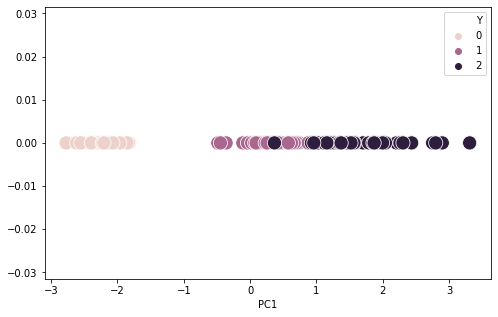

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Data on using only first Pricipal Component
plt.figure(figsize=(8, 5))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

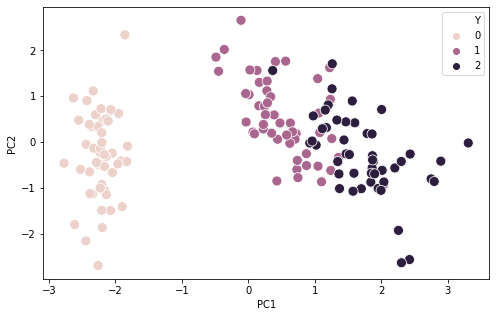

In [78]:
plt.figure(figsize=(8, 5))

# Plotting the Data on using only 'first Pricipal Component' and 'second Pricipal Component'

sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

### Example 01 :Before and After PCA

Compute PCA default
Iris_values before PCA: [4.9 3.  1.4 0.2]
Iris_values After PCA: [-2.71414169 -0.17700123 -0.21046427 -0.09902655]
Compute PCA with 2 Dimention
Iris_values before PCA: [4.9 3.  1.4 0.2]
Iris_values After PCA: [-2.71414169 -0.17700123]


Text(0.5, 1.0, 'After PCA')

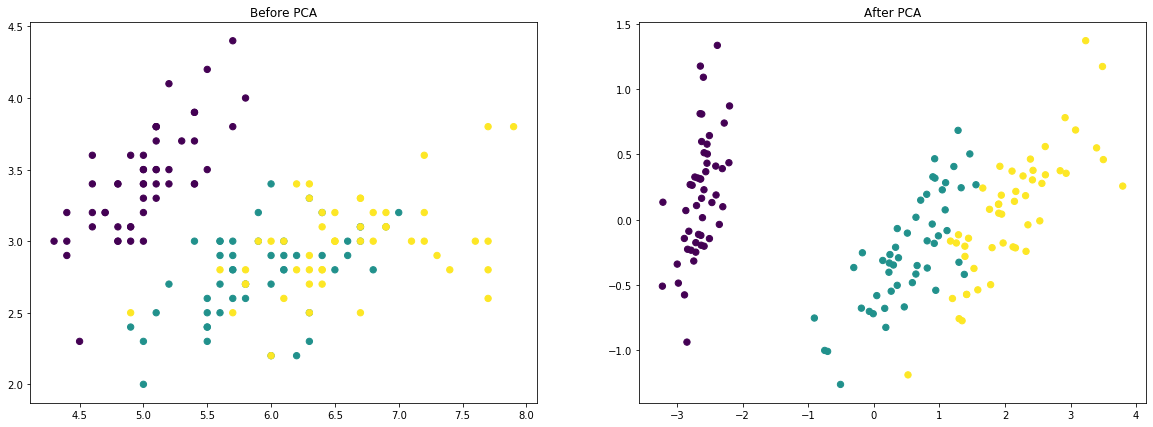

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
iris_X = iris.data  # 4 Featues
y = iris.target

print("Compute PCA default")
# Compute PCA
pca = PCA()
iris_pca = pca.fit_transform(iris_X)

print("Iris_values before PCA:",iris_X[1])
print("Iris_values After PCA:",iris_pca[1])

pca.explained_variance_ratio_

print("Compute PCA with 2 Dimention")
# Compute PCA with 2 Dimention
pca = PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

print("Iris_values before PCA:",iris_X[1])
print("Iris_values After PCA:",iris_X_prime[1])

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0],iris_X[:,1],c=y,s=40)
ax.set_title('Before PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax2.set_title('After PCA')

### PCA Before and After Scaling

Text(0.5, 1.0, 'PCA After Scaling')

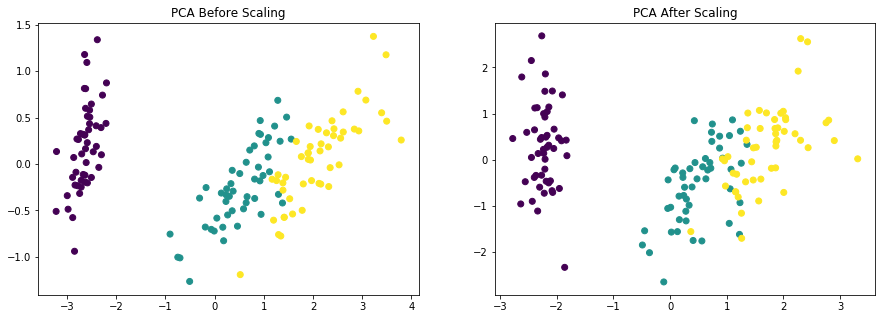

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

iris = load_iris()
iris_X = iris.data
y = iris.target

# Appply PCA for non Scaled Data
iris_X_PCA = PCA(n_components=2).fit_transform(iris_X)

# Scale the input Data
iris_X_Scaled = scale(iris_X)
# Appply PCA for Scaled Data
iris_X_Scaled_PCA = PCA(n_components=2).fit_transform(iris_X_Scaled)

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(iris_X_PCA[:,0],iris_X_PCA[:,1],c=y)
ax[0].set_title("PCA Before Scaling")

ax[1].scatter(iris_X_Scaled_PCA[:,0],iris_X_Scaled_PCA[:,1],c=y)
ax[1].set_title("PCA After Scaling")

### Explained_Variance_Ratio

pca..explained_variance_ratio_: [0.58134595 0.23915512 0.08041451 0.04008271 0.03026245 0.0254594
 0.00174367 0.00153619]


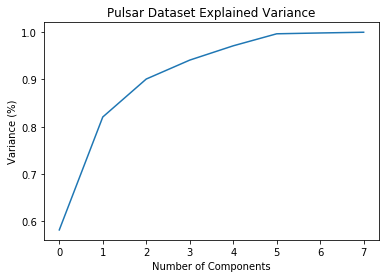

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("pulsar_stars.csv")

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data.iloc[1:, 0:8])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)

print("pca..explained_variance_ratio_:",pca.explained_variance_ratio_)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
### PCA with KNN

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# K-nearest neighbours will assign a class to a value depending on its k nearest training data points in Euclidean space, 
# where k is some number chosen by the user.¶

iris = datasets.load_iris()

X= pd.DataFrame(iris['data'],columns=iris['feature_names'])

y = iris['target']

# Now because the petal width/length and the sepal width/lengths are different scales 
# (the sepals of petals tend to be much larger than the petals), 
# we need to pre-process the data using a preprocessor.
# We will be using the MinMaxScaler, which scales the features according to:¶

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

# Now we should split our data into a training set and a test set in order to properly assess our model
from sklearn import model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,random_state =1)

# So that we can work with our data in 2- dimensional space,we will reduce the dimensionality of the data down to 2
# we will use principal component analusis

from sklearn.decomposition import PCA

pca = PCA(n_components =2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Implement KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

k =5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

pd.DataFrame({"Y_test" : y_test,"Y_Pred": y_pred})

,Y_test,Y_Pred
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2
